In [30]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from datetime import datetime

In [33]:
# Create list of 1500 random latitude and longitude combinations
lats = np.random.uniform(-90.,90.,size = 1500)
longs = np.random.uniform(-180.,180.,size = 1500)
lats_longs = zip(lats,longs)
coordinates = list(lats_longs)

In [34]:
# Create list of cities based on random latitude and longitude combinations
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    if city not in cities:
        cities.append(city)

# How many cities in list
len(cities)

631

In [8]:
# Import API-related library and API key for openweathermap.com
import requests
from config import weather_api_key

In [20]:
# Construct base url to access city weather from openweathermap.com
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [51]:
# Initialize list to contain city weather data
city_data = []

# For logging purposes
print("Beginning Data Retrieval       ")
print("-------------------------------")

record_count = 1
set_count = 1

# Fill city_data list
for i, city in enumerate(cities):
    # For logging purposes
    if(i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Construct url to access weather data for each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Logging
    print(f"Processing {record_count} of Set {set_count} | {city}")
    record_count +=1

    try:
        # Retrieve JSON data
        city_weather = requests.get(city_url).json()
        # Parse city data
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_min_temp = city_weather["main"]["temp_min"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert date into ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H-%M-%S")
        # Append data to city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lon,
                          "Max Temp": city_max_temp,
                          "Min Temp": city_min_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If error encountered in retrieving city weather data, log and continue
    except:
        print("City not found. Skipping...")
        pass
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")

Beginning Data Retrieval       
-------------------------------
Processing 1 of Set 1 | busselton
Processing 2 of Set 1 | laguna
Processing 3 of Set 1 | nanakuli
Processing 4 of Set 1 | udachnyy
Processing 5 of Set 1 | rikitea
Processing 6 of Set 1 | kapaa
Processing 7 of Set 1 | scottsburgh
City not found. Skipping...
Processing 8 of Set 1 | porbandar
Processing 9 of Set 1 | poso
Processing 10 of Set 1 | vaini
Processing 11 of Set 1 | umba
Processing 12 of Set 1 | hamilton
Processing 13 of Set 1 | bluff
Processing 14 of Set 1 | yellowknife
Processing 15 of Set 1 | ribeira grande
Processing 16 of Set 1 | bara
Processing 17 of Set 1 | khiv
Processing 18 of Set 1 | dhidhdhoo
Processing 19 of Set 1 | longyearbyen
Processing 20 of Set 1 | albany
Processing 21 of Set 1 | ushuaia
Processing 22 of Set 1 | nikolskoye
Processing 23 of Set 1 | portland
Processing 24 of Set 1 | san juan
Processing 25 of Set 1 | bima
Processing 26 of Set 1 | kamenskoye
City not found. Skipping...
Processing 27 of 

In [52]:
# Create dataframe from city_data list
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,50.04,45.09,74,0,9.33,AU,2021-09-05 20-04-39
1,Laguna,38.4210,-121.4238,98.44,88.92,22,1,1.99,US,2021-09-05 20-04-40
2,Nanakuli,21.3906,-158.1547,83.03,80.55,61,20,11.50,US,2021-09-05 20-04-40
3,Udachnyy,66.4167,112.4000,47.16,47.16,80,12,7.92,RU,2021-09-05 20-04-40
4,Rikitea,-23.1203,-134.9692,74.28,74.28,74,82,13.56,PF,2021-09-05 20-04-40
5,Kapaa,22.0752,-159.3190,82.72,79.12,68,40,5.01,US,2021-09-05 20-04-41
6,Porbandar,21.6422,69.6093,80.46,80.46,87,79,8.75,IN,2021-09-05 20-04-40
7,Poso,-1.3959,120.7524,76.01,76.01,89,100,5.14,ID,2021-09-05 20-04-41
8,Vaini,-21.2000,-175.2000,73.56,73.56,100,90,6.91,TO,2021-09-05 20-04-41
9,Umba,66.6871,34.3429,39.69,39.69,72,78,10.85,RU,2021-09-05 20-04-42


In [53]:
# Reorder df columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-09-05 20-04-39,-33.6500,115.3333,50.04,74,0,9.33
1,Laguna,US,2021-09-05 20-04-40,38.4210,-121.4238,98.44,22,1,1.99
2,Nanakuli,US,2021-09-05 20-04-40,21.3906,-158.1547,83.03,61,20,11.50
3,Udachnyy,RU,2021-09-05 20-04-40,66.4167,112.4000,47.16,80,12,7.92
4,Rikitea,PF,2021-09-05 20-04-40,-23.1203,-134.9692,74.28,74,82,13.56
5,Kapaa,US,2021-09-05 20-04-41,22.0752,-159.3190,82.72,68,40,5.01
6,Porbandar,IN,2021-09-05 20-04-40,21.6422,69.6093,80.46,87,79,8.75
7,Poso,ID,2021-09-05 20-04-41,-1.3959,120.7524,76.01,89,100,5.14
8,Vaini,TO,2021-09-05 20-04-41,-21.2000,-175.2000,73.56,100,90,6.91
9,Umba,RU,2021-09-05 20-04-42,66.6871,34.3429,39.69,72,78,10.85


In [54]:
# Save df to CSV
## Create output file
output_data_file = "weather_data/cities.csv"
## Export city_data_df to CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [55]:
# Extract relevant fields from df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

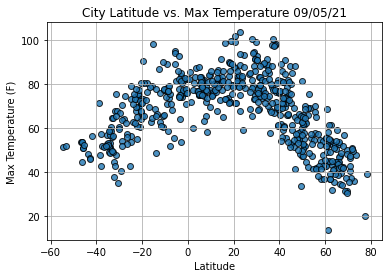

In [57]:
# Import time module
import time

# Scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,edgecolors="black", linewidths=1, marker ="o", alpha=0.8,label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

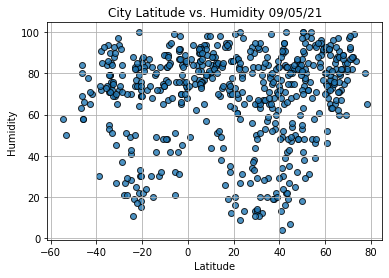

In [59]:
# Scatter plot for latitude vs. humidity
plt.scatter(lats, humidity,edgecolors="black", linewidths=1, marker ="o", alpha=0.8,label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

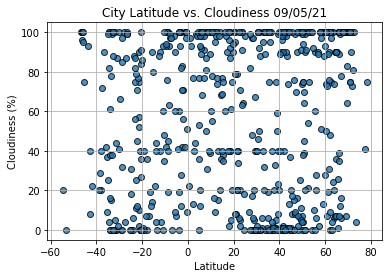

In [63]:
# Scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness,edgecolors="black", linewidths=1, marker ="o", alpha=0.8,label="Cities")

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

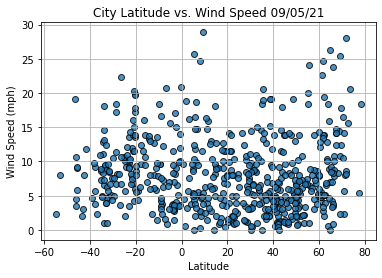

In [62]:
# Scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolors="black", linewidths=1, marker ="o", alpha=0.8,label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [65]:
# Function to perform linear regression on weather data and plot a regression line and its equation with the data
from scipy.stats import linregress

def plot_lin_regress(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_error) = linregress(x_values, y_values)

    # Calculate regression line "y values" from slope and intercept
    regress_values = x_values * slope + intercept

    # Get string regression line equation
    line_eq = "y = " + str(round(slope, 2)) + "x" + " + " + str(round(intercept, 2))

    # Create a scatter plot and plot regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")

    plt.annotate(line_eq,text_coordinates,fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()


In [66]:
# Create Northern and Southern Hemisphere dfs
n_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
s_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

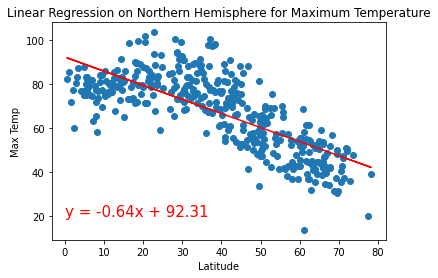

In [68]:
# Linear regression on Northern Hemisphere
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Max Temp"]

plot_lin_regress(x_values,y_values, "Linear Regression on Northern Hemisphere for Maximum Temperature", "Max Temp", (0,20))

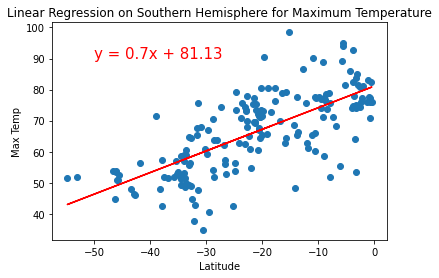

In [70]:
# Linear regression on Southern Hemisphere
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Max Temp"]

plot_lin_regress(x_values,y_values, "Linear Regression on Southern Hemisphere for Maximum Temperature", "Max Temp", (-50,90))